In [ ]:
!pip install torchdiffeq
!pip install git+https://github.com/rtqichen/torchdiffeq
import numpy as np
import matplotlib.pyplot as plt


  Cloning https://github.com/rtqichen/torchdiffeq to /tmp/pip-req-build-haygst08
  Running command git clone --filter=blob:none --quiet https://github.com/rtqichen/torchdiffeq /tmp/pip-req-build-haygst08
  Resolved https://github.com/rtqichen/torchdiffeq to commit a88aac53cae738addee44251288ce5be9a018af3
  Preparing metadata (setup.py) ... done


|  t   |     y     |    RK4    |   Exact   |
|------|-----------|-----------|-----------|
| 0.00 |  1.000000 |  1.000000 |       1.0 |
| 0.20 |  1.000000 |  1.020201 |    1.0202 |
| 0.40 |  1.040000 |  1.083287 |   1.08329 |
| 0.60 |  1.123200 |  1.197217 |   1.19722 |
| 0.80 |  1.257984 |  1.377126 |   1.37713 |
| 1.00 |  1.459261 |  1.648717 |   1.64872 |


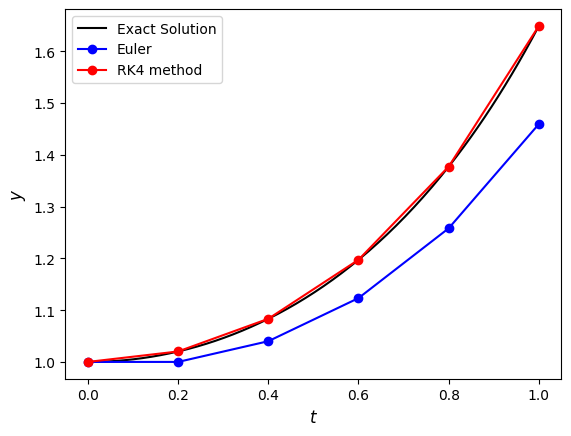

In [ ]:
def solveIVP(f, tspan, y0, h, solver):

    # Initialise t and y arrays
    t = np.arange(tspan[0], tspan[1] + h, h)
    y = np.zeros((len(t),len(y0)))
    y[0,:] = y0

    # Loop through steps and calculate single step solver solution
    for n in range(len(t) - 1):
        y[n+1,:] = solver(f, t[n], y[n,:], h)

    return t, y


def euler(f, t, y, h):
    return y + h * f(t, y)

def rk4(f, t, y, h):
    k1 = f(t, y)
    k2 = f(t + 0.5 * h, y + 0.5 * h * k1)
    k3 = f(t + 0.5 * h, y + 0.5 * h * k2)
    k4 = f(t + h, y + h * k3)
    return y + h / 6 * (k1 + 2 * k2 + 2 * k3 + k4)

# Define the ODE function
def f(t, y):
    return t * y

def exact(t):
  return np.exp(t**2/2)


# Define IVP parameters
tspan = [0, 1]  # boundaries of the t domain
y0 = [1]        # initial values
h = 0.2        # step length

# Calculate the solution to the IVP
t, yEuler = solveIVP(f, tspan, y0, h, euler)
t, yRK4 = solveIVP(f, tspan, y0, h, rk4)

# Print table of solution values
print("|  t   |     yEuler     |    RK4    |   Exact   |")
print("|------|-----------|-----------|-----------|")
for n in range(len(t)):
    print(f"| {t[n]:4.2f} | {yEuler[n,0]:9.6f} | {yRK4[n,0]:9.6f} | {exact(t[n]):9.6} |" )

#calculate exact solution
tExact=np.linspace(tspan[0], tspan[1], 200)
yExact=exact(tExact)
# Plot solution
fig, ax = plt.subplots()
plt.plot(tExact, yExact, "k-", label="Exact Solution")
plt.plot(t, yEuler, "bo-", label="Euler")
plt.plot(t, yRK4, "r-o", label="RK4 method")
plt.xlabel("$t$", fontsize=12)
plt.ylabel("$y$", fontsize=12)
plt.legend()
plt.show()

Exact solution: y(1) = 1.648721

|   h   |  Euler   |  Error   |   RK4   |  Error   |
|:-----:|:--------:|:--------:|:-------:|:--------:|
| 0.200 | 1.459261 | 1.89e-01 | 1.648717 | 4.59e-06 |
| 0.100 | 1.547110 | 1.02e-01 | 1.648721 | 2.64e-07 |
| 0.050 | 1.595942 | 5.28e-02 | 1.648721 | 1.55e-08 |
| 0.025 | 1.621801 | 2.69e-02 | 1.648721 | 9.33e-10 |


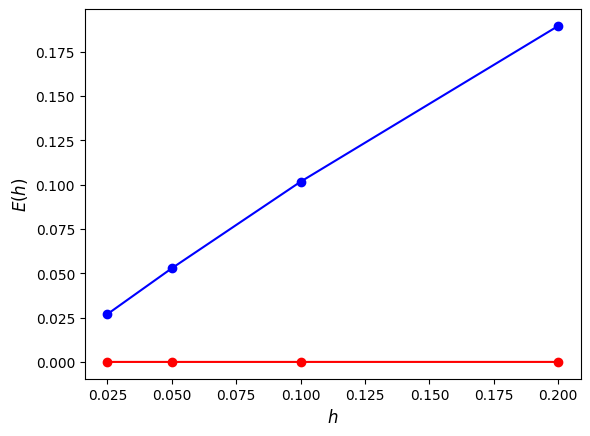

In [ ]:
# Define ODE function and the exact solution
def f(t,y):
    return t * y


def exact(t):
    return np.exp(t ** 2 / 2)


# Define IVP parameters
tspan = [0, 1]
y0 = [1]
hvals = [ 0.2, 0.1, 0.05, 0.025 ]  # step length values

# Loop through h values and calculate errors
errors = []
errorsRk4 = []
print(f"Exact solution: y(1) = {exact(1):0.6f}\n")
print("|   h   |  Euler   |  Error   |   RK4   |  Error   |")
print("|:-----:|:--------:|:--------:|:-------:|:--------:|")
for h in hvals:
    t, y = solveIVP(f, tspan, y0, h, euler)
    t, yrk4 = solveIVP(f, tspan, y0, h, rk4)
    errors.append(abs(y[-1,0] - exact(t[-1])))
    errorsRk4.append(abs(yrk4[-1,0] - exact(t[-1])))
    print(f"| {h:0.3f} | {y[-1,0]:0.6f} | {errors[-1]:0.2e} | {yrk4[-1,0]:0.6f} | {errorsRk4[-1]:0.2e} |")

# Plot errors
fig, ax = plt.subplots()
plt.plot(hvals, errors, "bo-")
plt.plot(hvals, errorsRk4, "ro-")
plt.xlabel("$h$", fontsize=12)
plt.ylabel("$E(h)$", fontsize=12)
plt.show()